In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import fetch_openml
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [27]:
# Step 1: Read the FashionMNIST dataset
X, y = fetch_openml('Fashion-MNIST', version=1, return_X_y=True, as_frame=False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


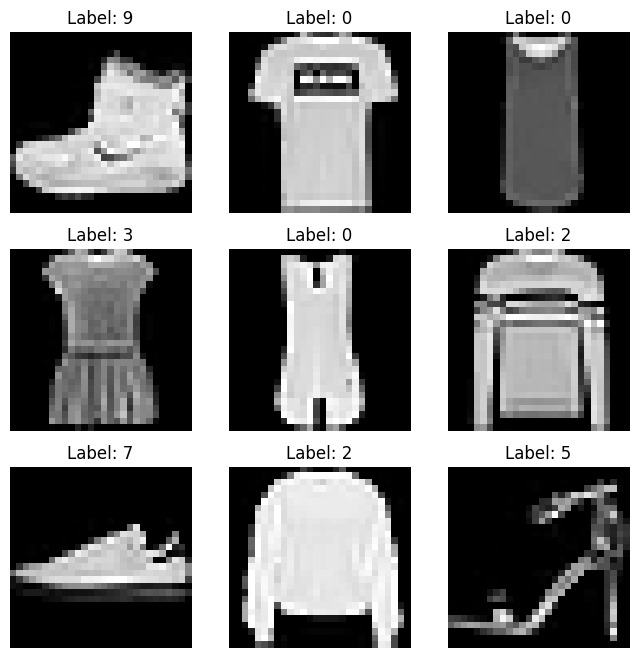

In [28]:
# Step 2: Preprocess the data
# Display a sample of the data
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(X[i].reshape(28, 28), cmap='gray')
    ax.axis('off')
    ax.set_title(f'Label: {y[i]}')
plt.show()

In [29]:
# Step 4: Separate training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Step 3: Normalize the data and convert 28x28 matrix to 1x784
X_train = X_train.reshape((-1, 784)) / 255.0
X_test = X_test.reshape((-1, 784)) / 255.0

In [31]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [ ]:
# Step 5: Train AdaBoost model
clf1 = DecisionTreeClassifier(random_state=42)
clf2 = KNeighborsClassifier(n_neighbors=5)
clf3 = SVC(kernel='rbf', probability=True, random_state=42)

estimators = [('dt', clf1), ('knn', clf2), ('svc', clf3)]
model = StackingClassifier(estimators=estimators, final_estimator=DecisionTreeClassifier())
model.fit(X_train, y_train)

In [22]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Training accuracy with model: {train_accuracy:.4f}')
print(f'Testing accuracy with model: {test_accuracy:.4f}')

Training accuracy with model: 0.9929
Testing accuracy with model: 0.9034


In [23]:
# Step 6: Cross-validation and error report
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
mean_cv_error = 1 - np.mean(cv_scores)
print(f'Cross-validation error: {mean_cv_error:.4f}')

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.274292 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 169439
[LightGBM] [Info] Number of data points in the train set: 44800, number of used features: 783
[LightGBM] [Info] Start training from score -2.301470
[LightGBM] [Info] Start training from score -2.302808
[LightGBM] [Info] Start training from score -2.303925
[LightGBM] [Info] Start training from score -2.311329
[LightGBM] [Info] Start training from score -2.294803
[LightGBM] [Info] Start training from score -2.311329
[LightGBM] [Info] Start training from score -2.303925
[LightGBM] [Info] Start training from score -2.295246
[LightGBM] [Info] Start training from score -2.292370
[LightGBM] [Info] Start training from score -2.308855
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.891799 seconds.
You can set `force_col_wise=true` to remove the overhead.
[Light

In [24]:
# Step 7: Calculate accuracy and correctness on training and test data
train_predictions = model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
test_predictions = model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print(f'Training accuracy: {train_accuracy:.4f}')
print(f'Test accuracy: {test_accuracy:.4f}')

Training accuracy: 0.9929
Test accuracy: 0.9034


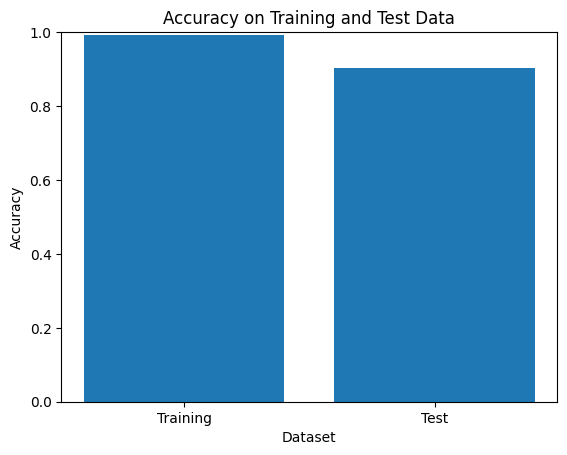

In [25]:
plt.bar(['Training', 'Test'], [train_accuracy, test_accuracy])
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.title('Accuracy on Training and Test Data')
plt.ylim([0, 1.0])
plt.show()